In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import dc_stat_think as dcst
import seaborn as sns
import statsmodels

In [14]:
sns.set()

In [15]:
jpy = pd.read_csv("JPY.csv").Close
aud = pd.read_csv("AUD.csv").Close
jpy.iloc[295] = np.mean([jpy.iloc[294], jpy.iloc[296]])
aud.iloc[295] = np.mean([aud.iloc[294], aud.iloc[296]])

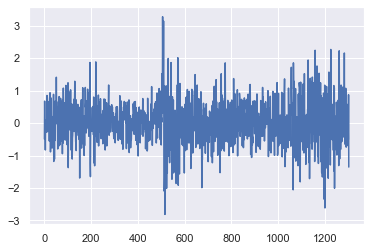

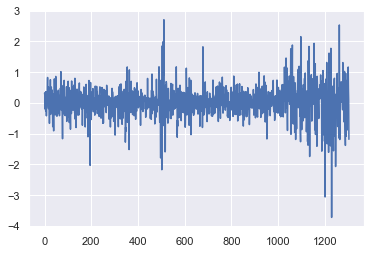

In [16]:
jpy1 = np.diff(jpy)/jpy[:-1]*100
aud1 = np.diff(aud)/aud[:-1]*100

plt.plot(aud1)
plt.show()
plt.plot(jpy1)
plt.show()

In [48]:
jpy1

0       0.317566
1       0.260363
2      -0.078467
3      -0.204735
4       0.340985
          ...   
1299   -0.142492
1300    1.167528
1301    0.471428
1302    0.109606
1303   -1.184880
Name: Close, Length: 1304, dtype: float64

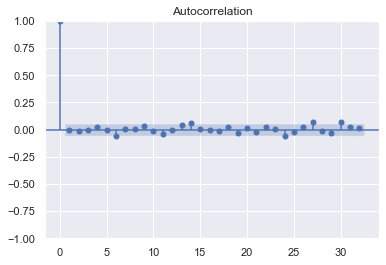

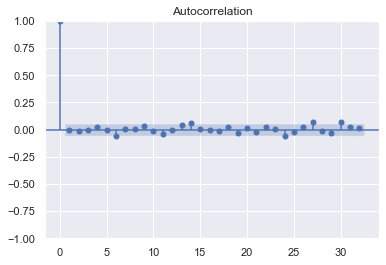

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(jpy1)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


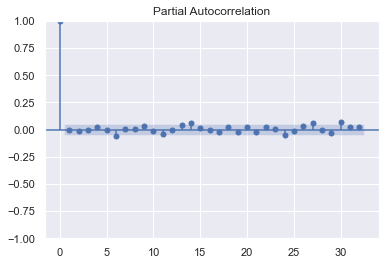

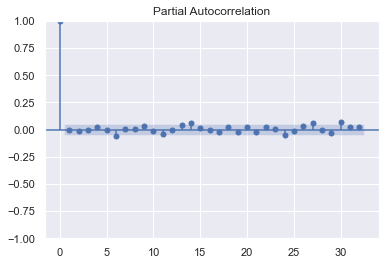

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(jpy1)

In [22]:
from statsmodels.tsa.stattools import adfuller
adfuller(jpy1)[1]

0.0

In [21]:
adfuller(aud1)[1]

0.0

In [28]:
from statsmodels.tsa.arima.model import ARIMA
arim = ARIMA(jpy1, order = (1,1,3))
model = arim.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1304
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -978.969
Date:                Thu, 25 May 2023   AIC                           1967.937
Time:                        16:13:30   BIC                           1993.799
Sample:                             0   HQIC                          1977.640
                               - 1304                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9972      0.012    -83.490      0.000      -1.021      -0.974
ma.L1         -0.0052      0.666     -0.008      0.994      -1.310       1.299
ma.L2         -0.9944      0.664     -1.498      0.134      -2.296       0.307
ma.L3         -0.0003      0.021     -0.016      0.987      -0.041       0.041
sigma2         0.2616      0.175      1.491      0.136      -0.082       0.606
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1831.13
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.96   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
model.aic

1967.937171383636

In [30]:
vv = {}
vv

{}

In [31]:
vv['dd'] = 'ss'

In [32]:
vv

{'dd': 'ss'}

In [36]:
vals = {}
for x in range(5):
    for y in range(5):
        arim = ARIMA(jpy1, order = (x+1 ,0, y+1))
        model = arim.fit()
        vals[str(x+1)+","+str(y+1)] = model.aic
vals

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings

{'1,1': 1960.6669815022449,
 '1,2': 1962.513126122861,
 '1,3': 1964.4974730558383,
 '1,4': 1965.948086232274,
 '1,5': 1967.0928415134763,
 '2,1': 1962.4991038582905,
 '2,2': 1949.4064291492741,
 '2,3': 1952.560035370805,
 '2,4': 1959.4220549572938,
 '2,5': 1958.6631178374255,
 '3,1': 1964.4957418509766,
 '3,2': 1952.5411322672403,
 '3,3': 1952.7962235133657,
 '3,4': 1954.8077024163108,
 '3,5': 1956.2887217164491,
 '4,1': 1965.8748993240056,
 '4,2': 1952.8908043869224,
 '4,3': 1956.6333869718121,
 '4,4': 1955.8898374477212,
 '4,5': 1958.1441610934453,
 '5,1': 1967.0512265253124,
 '5,2': 1955.1458937006257,
 '5,3': 1956.624924605874,
 '5,4': 1958.2769544098885,
 '5,5': 1959.5940898114081}

p,q = 2,2

In [37]:
vals = {}
for x in range(5):
    for y in range(5):
        arim = ARIMA(jpy1, order = (x+1 ,2, y+1))
        model = arim.fit()
        vals[str(x+1)+","+str(y+1)] = model.aic
vals

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'1,1': 2505.2785075631496,
 '1,2': 1985.3271922741005,
 '1,3': 1987.0359424838127,
 '1,4': 1989.6072808963017,
 '1,5': 1991.5734658183808,
 '2,1': 2349.3072198312248,
 '2,2': 1989.3355169905237,
 '2,3': 1988.994777633151,
 '2,4': 1981.3862063096685,
 '2,5': 1984.244738910641,
 '3,1': 2253.5307111594225,
 '3,2': 1990.6504090597869,
 '3,3': 1991.3801121318434,
 '3,4': 1991.9402978087776,
 '3,5': 1988.7167118184907,
 '4,1': 2206.4994793306264,
 '4,2': 1990.9197863127033,
 '4,3': 1993.5653811605148,
 '4,4': 1985.9511352708514,
 '4,5': 1989.8518410057602,
 '5,1': 2190.602728648544,
 '5,2': 2207.9343826440254,
 '5,3': 2249.3739552819598,
 '5,4': 1990.9814201441257,
 '5,5': 1991.311453719307}

In [38]:
vals = {}
for x in range(5):
    for y in range(5):
        arim = ARIMA(jpy1, order = (x+1 ,1, y+1))
        model = arim.fit()
        vals[str(x+1)+","+str(y+1)] = model.aic
vals

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Ma

{'1,1': 1965.4025649134583,
 '1,2': 1965.9378651372942,
 '1,3': 1967.937171383636,
 '1,4': 1969.591440087865,
 '1,5': 1971.5658277155758,
 '2,1': 1967.1881195494357,
 '2,2': 1967.9371757722924,
 '2,3': 1961.6902304304836,
 '2,4': 1966.2028600873955,
 '2,5': 2014.4165500434306,
 '3,1': 1969.1878655364449,
 '3,2': 1971.0345931074444,
 '3,3': 1964.8365527601065,
 '3,4': 1969.0043026715284,
 '3,5': 1974.9430367366374,
 '4,1': 1970.5368551112922,
 '4,2': 1971.5571036177296,
 '4,3': 1967.9542324572299,
 '4,4': 1968.1499937401795,
 '4,5': 1967.6545138551849,
 '5,1': 1972.5312966215035,
 '5,2': 1973.3337562545225,
 '5,3': 1970.0103371564305,
 '5,4': 1963.5092934985453,
 '5,5': 1960.9074614310598}

In [39]:

arim = ARIMA(jpy1, order = (2,0,2))
model = arim.fit()
model.summary()

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1304
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -968.703
Date:                Thu, 25 May 2023   AIC                           1949.406
Time:                        16:27:48   BIC                           1980.446
Sample:                             0   HQIC                          1961.051
                               - 1304                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0181      0.014      1.266      0.206      -0.010       0.046
ar.L1          0.3341      0.017     20.134      0.000       0.302       0.367
ar.L2         -0.9831      0.017    -58.700      0.000      -1.016      -0.950
ma.L1         -0.3478      0.021    -16.932      0.000      -0.388      -0.308
ma.L2          0.9720      0.021     45.825      0.000       0.930       1.014
sigma2         0.2610      0.006     47.025      0.000       0.250       0.272
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              1732.67
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               2.87   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


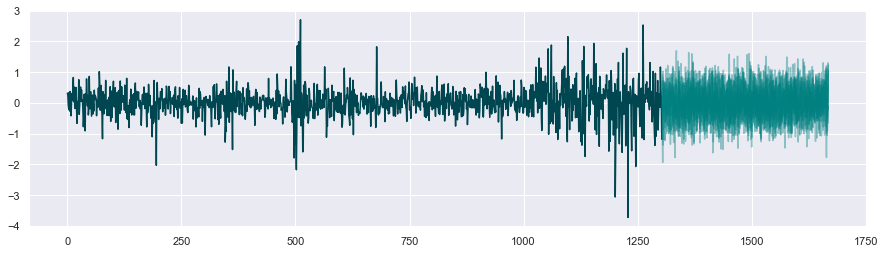

In [150]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load data
#y = sm.datasets.macrodata.load_pandas().data['cpi']
#y.index = pd.period_range('1959Q1', '2009Q3', freq='Q')

# Create and fit the model
mod = sm.tsa.SARIMAX(jpy1, order=(2, 0, 2), trend='c')
res = mod.fit()

# Simulate data starting at the end of the time series
sim = res.simulate(365, anchor='end', repetitions=10)

# Plot the data and simulations
fig, ax = plt.subplots(figsize=(15, 4))
jpy1.plot(color='#004651', ax=ax)
sim.plot(ax=ax, color='teal', alpha=0.4, legend=False);

In [98]:
import statsmodels.api as sm

# Create and fit the model
mod = sm.tsa.SARIMAX(jpy1, order=(2, 0, 2), trend='c')
res = mod.fit()

# Simulate data starting at the end of the time series
vall = res.simulate(365, anchor='end', repetitions=1000)
val_365 = vall.iloc[-1]

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [99]:
v = np.array(val_365)

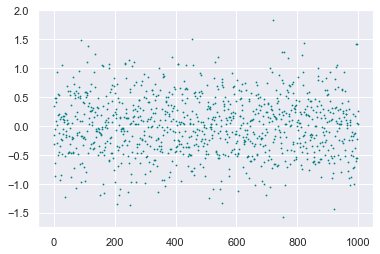

In [100]:
plt.scatter(range(len(v)), v, s =0.6, color="teal")

In [101]:
np.quantile(v,0.99)

1.2232535457349982

In [102]:
np.quantile(v,0.95)

0.8501030266915327

In [103]:
np.quantile(v,0.01)

-1.1528355517006952

In [104]:
np.quantile(v,0.05)

-0.8368808786027552

In [111]:
data = pd.Series(jpy1, name="jpy")

<AxesSubplot:>

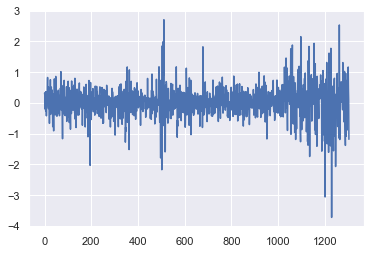

In [115]:
data.plot()

ja nie wiem co ten predict, ale no nie działa

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

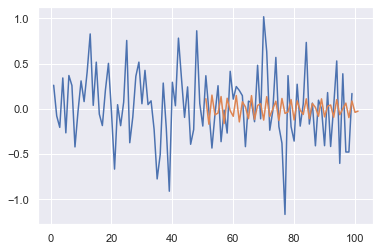

In [132]:
model=sm.tsa.statespace.SARIMAX(jpy1[1:100],order=(2, 0, 2))
results=model.fit()
forecast=results.predict(start=50,end=100,dynamic=True)
plt.plot(jpy1[1:100])
forecast.plot()